In [214]:
import sys
import os
import glob
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'

import floatpy.readers.padeops_reader as por
import floatpy.readers.parallel_reader as pdr
import floatpy.utilities.reduction as red
import floatpy.derivatives.compact.compact_derivative as cd
import scripts.statistics as stats

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/256x512x128/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/512x724x256/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/1024x1448x512/'

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc04/rr1/256x512x128/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc04/rr1/1024x1448x512/'

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc07/rr1/724x1024x362/'

directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/512x724x256/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/1024x1024x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/1024x1448x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr7/1024x1448x512/'

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x384x128/with_LAD/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/724x724x256/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/1024x1024x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/1024x1448x512/'

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc16/rr1/1024x1448x512/'

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/'

flist = glob.glob(directory+"*Rij*")
print(flist)

['/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/512x724x256/shearlayer_Rij_0027.dat', '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/512x724x256/shearlayer_Rij_0028.dat', '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/512x724x256/shearlayer_Rij_0029.dat', '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/512x724x256/shearlayer_Rij_0030.dat', '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/512x724x256/shearlayer_Rij_0031.dat', '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/512x724x256/shearlayer_Rij_0032.dat', '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/512x724x256/shearlayer_Rij_0033.dat', '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/512x724x256/shearlayer_Rij_0034.dat', '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/512x724x256/shearlayer_Rij_0035.dat', '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/512x724x256/shearlayer_Rij_0036.dat',

0.13775073996451198


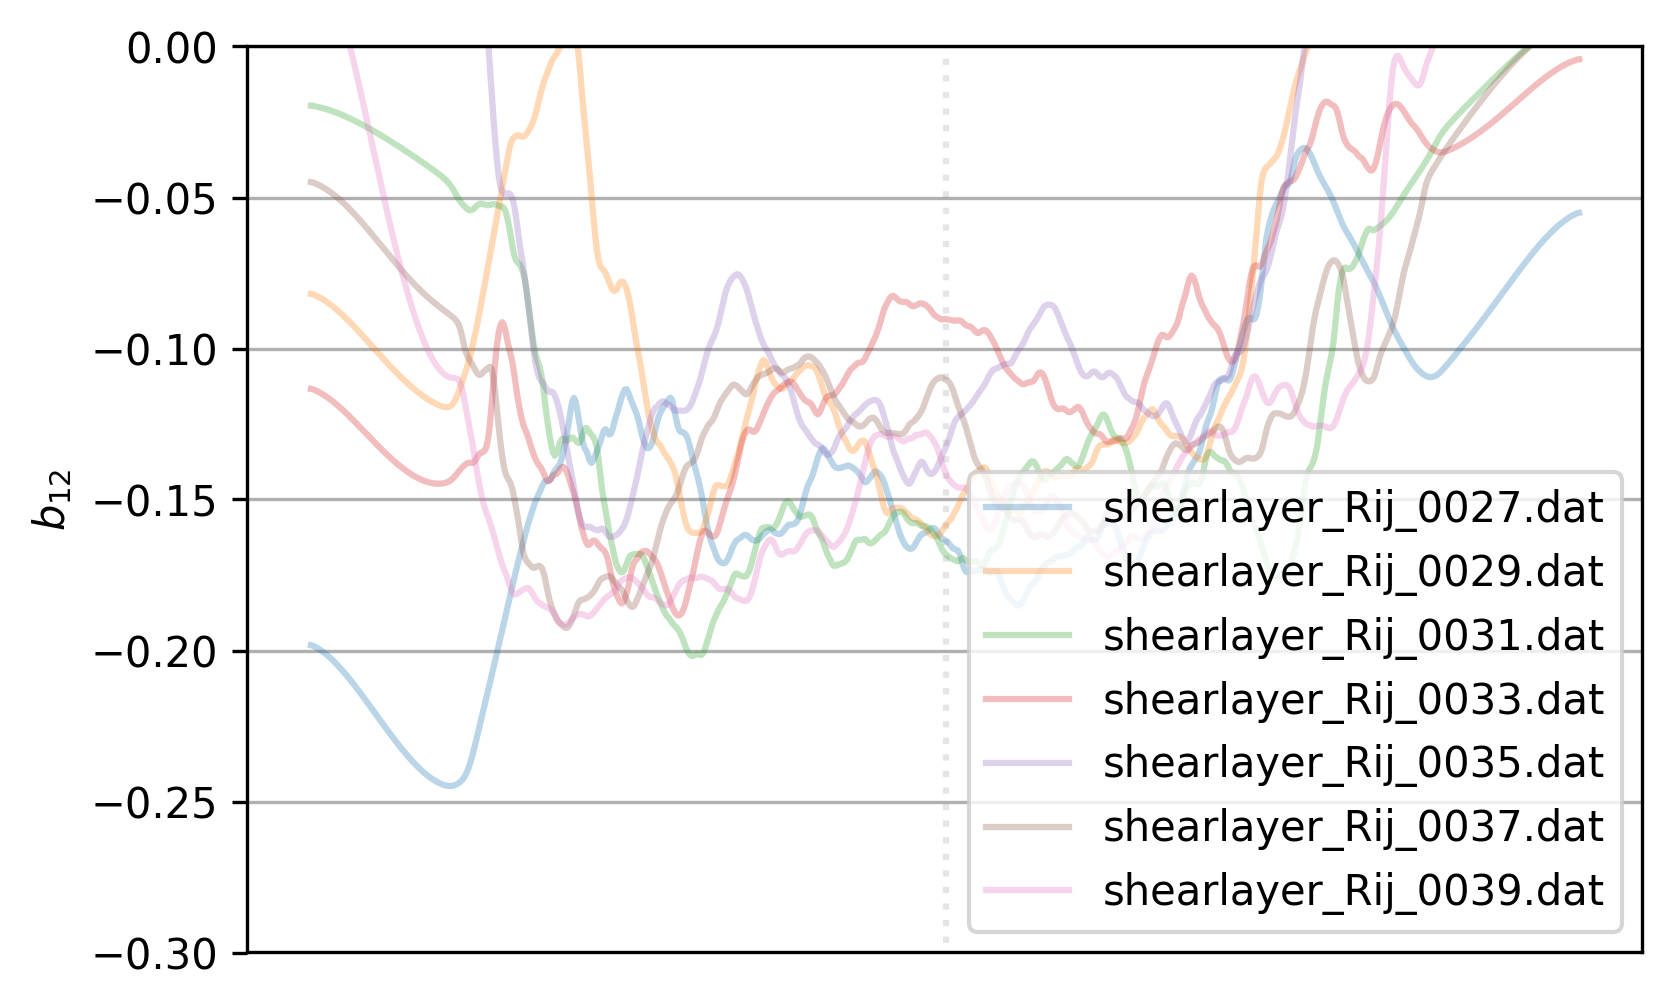

In [217]:
# Anisotropy profiles
fig = plt.figure(dpi=300)
ny = 724
plt.plot([ny/2,ny/2],[-1,0],'k:',alpha=0.1)

b12_mean = 0; count=0
for fname in flist[0::2]:
    dat = np.fromfile(fname,dtype=float, count=-1, sep=' ')
    n = np.size(dat)
    nstats=6
    dat = np.reshape(dat,[n/nstats,nstats])
    R11 = dat[:,0]
    R12 = dat[:,1]
    R13 = dat[:,2]
    R22 = dat[:,3]
    R23 = dat[:,4]
    R33 = dat[:,5]
    b12 = R12/(R11+R22+R33)
    b12_mean += b12[ny/2-1]; count+=1
    plt.plot(b12,alpha=0.3,label=fname.split('/')[-1])
plt.grid(True)
plt.ylim([-0.3,0])
plt.xticks([],[''])
plt.ylabel('$b_{12}$')
plt.legend()

# plt.legend()#['centerline','t = 40','t = 50','t = 60','t = 70'])
print(abs(b12_mean/count))

Text(0.5,1,'Mc08/rr1/1024x1024x512/')

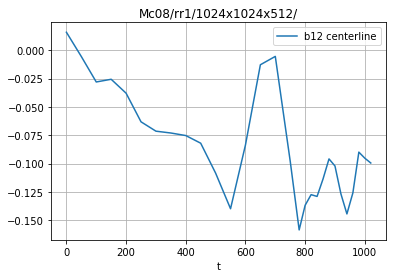

In [75]:
# Anisotropy (centerline)
filename_prefix = directory+'/shearlayer_'
fname = filename_prefix+'anisotropy.dat'
dat = np.fromfile(fname,dtype=float, count=-1, sep=' ')

n = np.size(dat)

nstats=2
dat = np.reshape(dat,[n/nstats,nstats])
time = dat[:,0]
b12_center = dat[:,1]
# b12_max = dat[:,2]

# Plotting
fig = plt.figure() 
plt.plot(time,b12_center,label='b12 centerline'); 
plt.grid(True)
plt.xlabel('t')
plt.legend()
plt.title(directory.split('/production/')[-1])

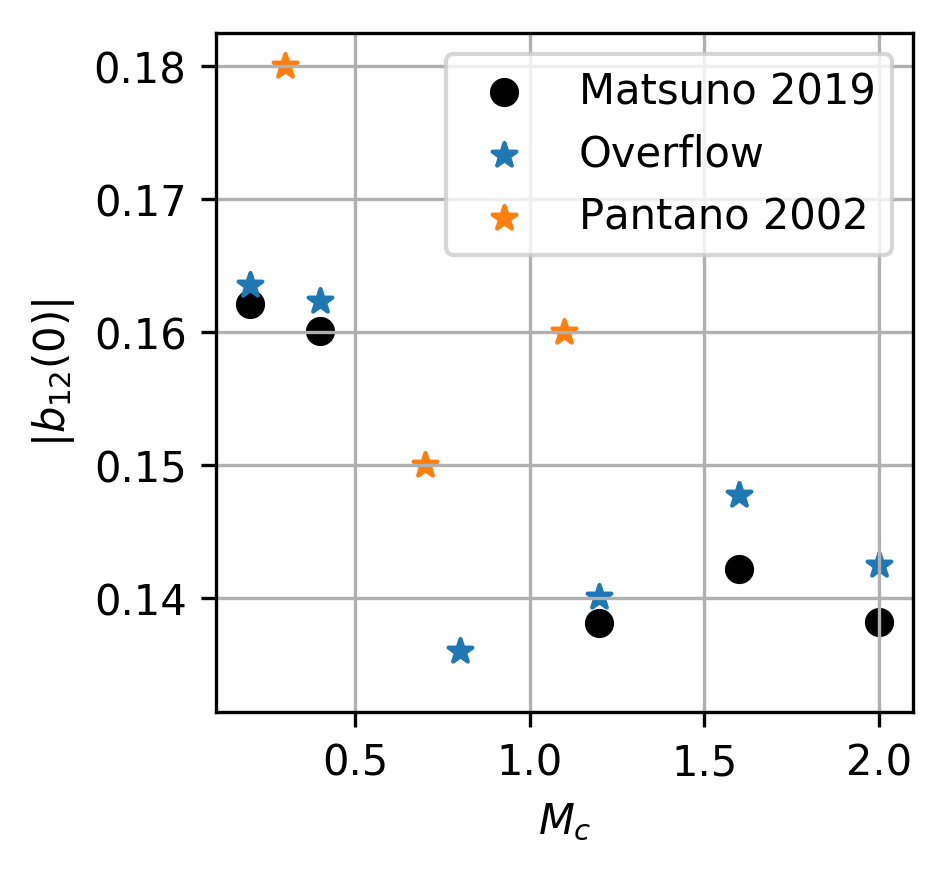

In [223]:
b12 = {
    #0.2: 0.20, #256x512
    0.2: 0.16208151739719856, #1024x1448
    0.4: 0.16010185192447407, #1024x1448
#     0.8: 0.13460759273371445, #512x724
    1.2: 0.13817515166261418, #1024x1448
    1.6: 0.14218159948980122, #1024x1448
    2.0: 0.13823740129737355 #1024x1448
}
fig = plt.figure(figsize=(3,3),dpi=300)
plt.scatter(b12.keys(),b12.values(),c='k',label='Matsuno 2019')
b12 = {
    0.2: 0.16349801116611212,
    0.4: 0.1623386691065894, 
    0.8: 0.1360584396692376,
    1.2: 0.14007561217312442,
    1.6: 0.14771853564516646,
    2.0: 0.1425056451378281
}
plt.scatter(b12.keys(),b12.values(),marker='*',label='Overflow')
b12 = {
    0.3: 0.18,
    0.7: 0.15, 
    1.1: 0.16,
}
plt.scatter(b12.keys(),b12.values(),marker='*',label='Pantano 2002')


plt.grid(True)
plt.xlabel(r'$M_c$')
plt.ylabel(r'$|b_{12}(0)|$')
plt.legend()